In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [2]:
fb=pd.read_csv('dataset_Facebook.csv',sep=';')
print(fb.columns)

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')


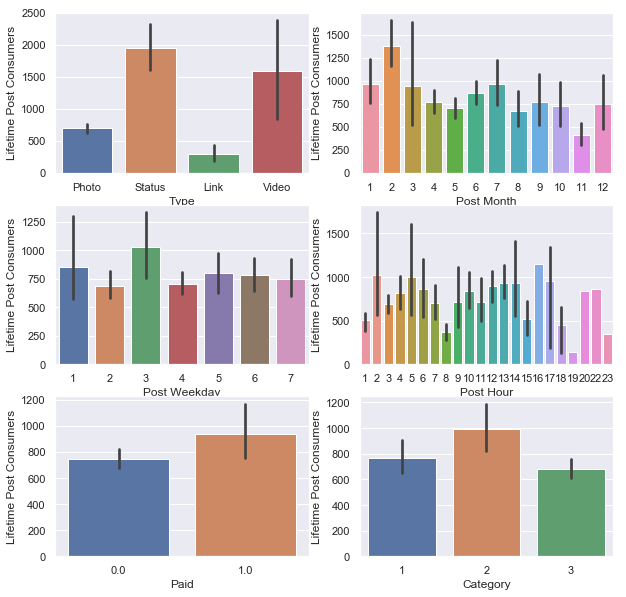

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10 ))
sns.barplot(x='Type', y='Lifetime Post Consumers',  data=fb, ax=axes[0, 0])
sns.barplot(x='Post Month', y='Lifetime Post Consumers', data=fb,ax=axes[0, 1])
sns.barplot(x='Post Weekday', y='Lifetime Post Consumers', data=fb,ax=axes[1, 0])
sns.barplot(x='Post Hour', y='Lifetime Post Consumers', data=fb,ax=axes[1, 1])
sns.barplot(x='Paid', y='Lifetime Post Consumers', data=fb,ax=axes[2, 0])
sns.barplot(x='Category', y='Lifetime Post Consumers', data=fb,ax=axes[2, 1])


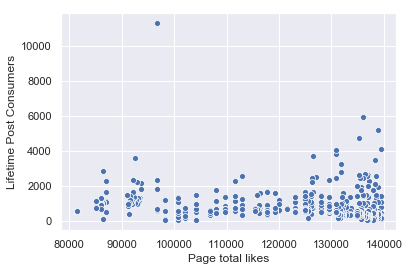

In [4]:
plt.figure()

sns.scatterplot(x='Page total likes',y='Lifetime Post Consumers', data=fb);


In [5]:
print(fb.isnull().sum())
columns_with_nan = fb.columns[fb.isna().any()].tolist()
fb2=fb[~fb['Paid'].isnull()]
fb2=fb2[~fb2['like'].isnull()]
fb2=fb2[~fb2['share'].isnull()]


X=pd.concat([fb2.iloc[:,:10],fb2.iloc[:,11:]], axis=1)
y=fb2.iloc[:,10].values

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

X['Type'] = labelencoder_X.fit_transform(X.iloc[:,1])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
model=SVR(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_train)

Text(0.5, 1.0, 'SVR Model')

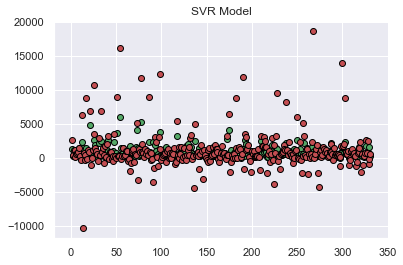

In [9]:
plt.figure()
X_grid = np.arange(1, X_train.shape[0]+1, 1)
plt.scatter(X_grid, y_train, c='g', label='data', zorder=1,
            edgecolors=(0, 0, 0))

plt.scatter(X_grid, y_pred, c='r', label='test', zorder=1,
            edgecolors=(0, 0, 0))

plt.title("SVR Model")

Text(0.5, 1.0, 'SVR Model- Actual vs Predict')

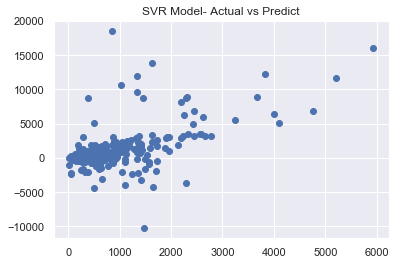

In [10]:
plt.figure()
plt.scatter(y_train,y_pred)
plt.title("SVR Model- Actual vs Predict")



[ 7.09090558e-04 -4.39841389e+00 -4.99166783e-01 -3.88123325e+00
 -7.64090803e-01 -3.58297139e-01 -1.26808950e+00 -1.11761076e-03
  2.75206141e-04  1.02376406e+00  8.50446700e-03 -2.94835941e-04
  9.27544669e-04 -4.51331235e-03  1.94490667e-01 -9.77270043e-01
  8.28156554e-01  4.53771777e-02]


Text(0.5, 1.0, 'Linear Regression Model- Actual vs Predict')

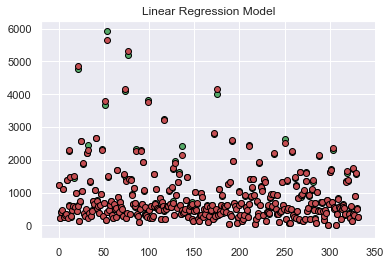

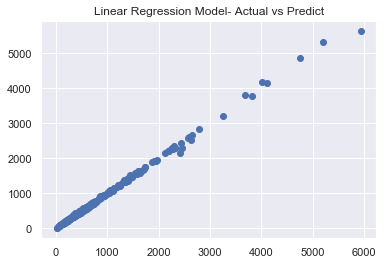

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit( X_train,y_train)
print(lm.coef_)

#Predicting the Test set results
y_pred = lm.predict(X_train)

X_grid = np.arange(1, X_train.shape[0]+1, 1)

plt.figure()
plt.scatter(X_grid, y_train, c='g', label='data', zorder=1,
            edgecolors=(0, 0, 0))

plt.scatter(X_grid, y_pred, c='r', label='test', zorder=1,
            edgecolors=(0, 0, 0))

plt.title("Linear Regression Model")

plt.figure()
plt.scatter(y_train,y_pred)
plt.title("Linear Regression Model- Actual vs Predict")